# Overview
In the capstone project our goal is to use all the knowledge gained through this course and create several machine learning models (k-nearest neighbors, logistic regression, decision trees, and support vector machines) to predict the outcome of an event and then compare the performance of the classifiers to determine which model should be selected as the best performing model. The intended audience for this analysis is the marketing team within the travel company. As such, the write up should not be technical in nature and clearly provide insight and findings within the data and provide actionable next steps.

CRISP-DM steps 1 and 2 are reviewed in the README file.

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import time
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from mpl_toolkits import mplot3d
from statsmodels.tsa import arima_process
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('/Users/benjaminbond/Module20/TravelInsurancePrediction.csv')

In [3]:
data.head(15)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
5,5,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0
6,6,31,Government Sector,Yes,1300000,4,0,No,No,0
7,7,31,Private Sector/Self Employed,Yes,1350000,3,0,Yes,Yes,1
8,8,28,Private Sector/Self Employed,Yes,1450000,6,1,Yes,Yes,1
9,9,33,Government Sector,Yes,800000,3,0,Yes,No,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           1987 non-null   int64
 1   Age                  1987 non-null   int64
 2   Employment Type      1987 non-null   int64
 3   GraduateOrNot        1987 non-null   int64
 4   AnnualIncome         1987 non-null   int64
 5   FamilyMembers        1987 non-null   int64
 6   ChronicDiseases      1987 non-null   int64
 7   FrequentFlyer        1987 non-null   int64
 8   EverTravelledAbroad  1987 non-null   int64
 9   TravelInsurance      1987 non-null   int64
dtypes: int64(10)
memory usage: 155.4 KB


Total row count: 1,986

Target variable is TravelInsurance

## Data Preparation: CRISP-DM Step 3
### Data preparation after our initial exploration

<Axes: title={'center': 'Missing data'}>

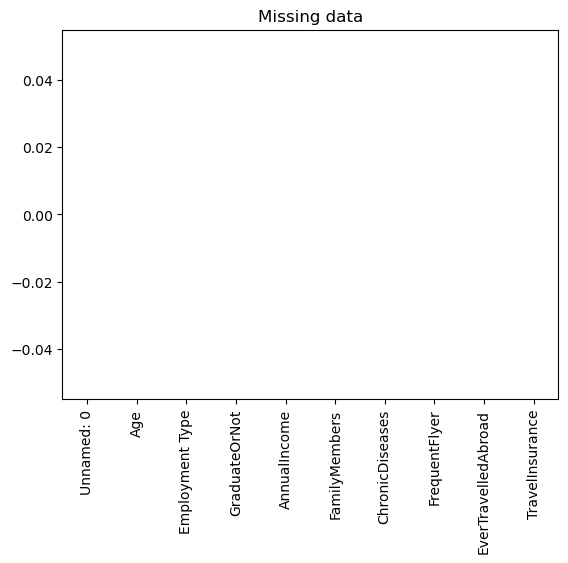

In [6]:
data.isnull().sum().sort_values().plot(kind='bar',title='Missing data')

The plot above shows there are no missing data for any of the dataset features.

In [7]:
# Convert object (categorical) features to integers
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [8]:
# Validate encoder worked as expected
data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,0,1,400000,6,1,0,0,0
1,1,31,1,1,1250000,7,0,0,0,0
2,2,34,1,1,500000,4,1,0,0,1
3,3,28,1,1,700000,3,1,0,0,0
4,4,28,1,1,700000,8,1,1,0,0


In [9]:
# Return distinct counts of data in each feature
feature = ['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']

distinct_count = data[feature].nunique()

print("Distinct count of data in feature '{}': {}".format(feature, distinct_count))

Distinct count of data in feature '['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']': Age                    11
Employment Type         2
GraduateOrNot           2
AnnualIncome           30
FamilyMembers           8
ChronicDiseases         2
FrequentFlyer           2
EverTravelledAbroad     2
TravelInsurance         2
dtype: int64


Calculate the percent of observations with a positive indicator in the target variable:

In [10]:
# Calculate the percentage of rows with TravelInsurance == 1
travel_insurance_count = data['TravelInsurance'].sum()
total_rows = len(data)
percent_travel_insurance = (travel_insurance_count / total_rows) * 100

print(f"Percentage of rows with TravelInsurance = 1: {percent_travel_insurance:.2f}%")


Percentage of rows with TravelInsurance = 1: 35.73%


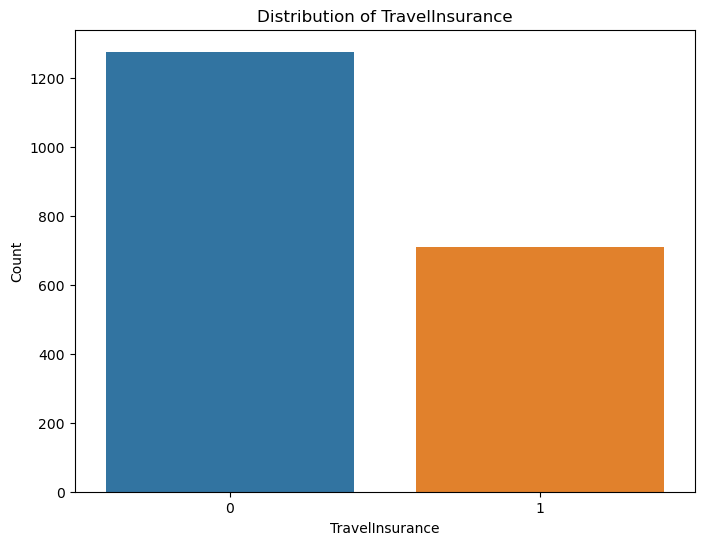

In [11]:
# Plot the distribution of the 'TravelInsurance' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='TravelInsurance', data=data)
plt.title('Distribution of TravelInsurance')
plt.xlabel('TravelInsurance')
plt.ylabel('Count')
plt.show()


The following code creates a pairplot returning a visualization of the data. In this case, we are looking for outliers or skewed data.

/Users/benjaminbond/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


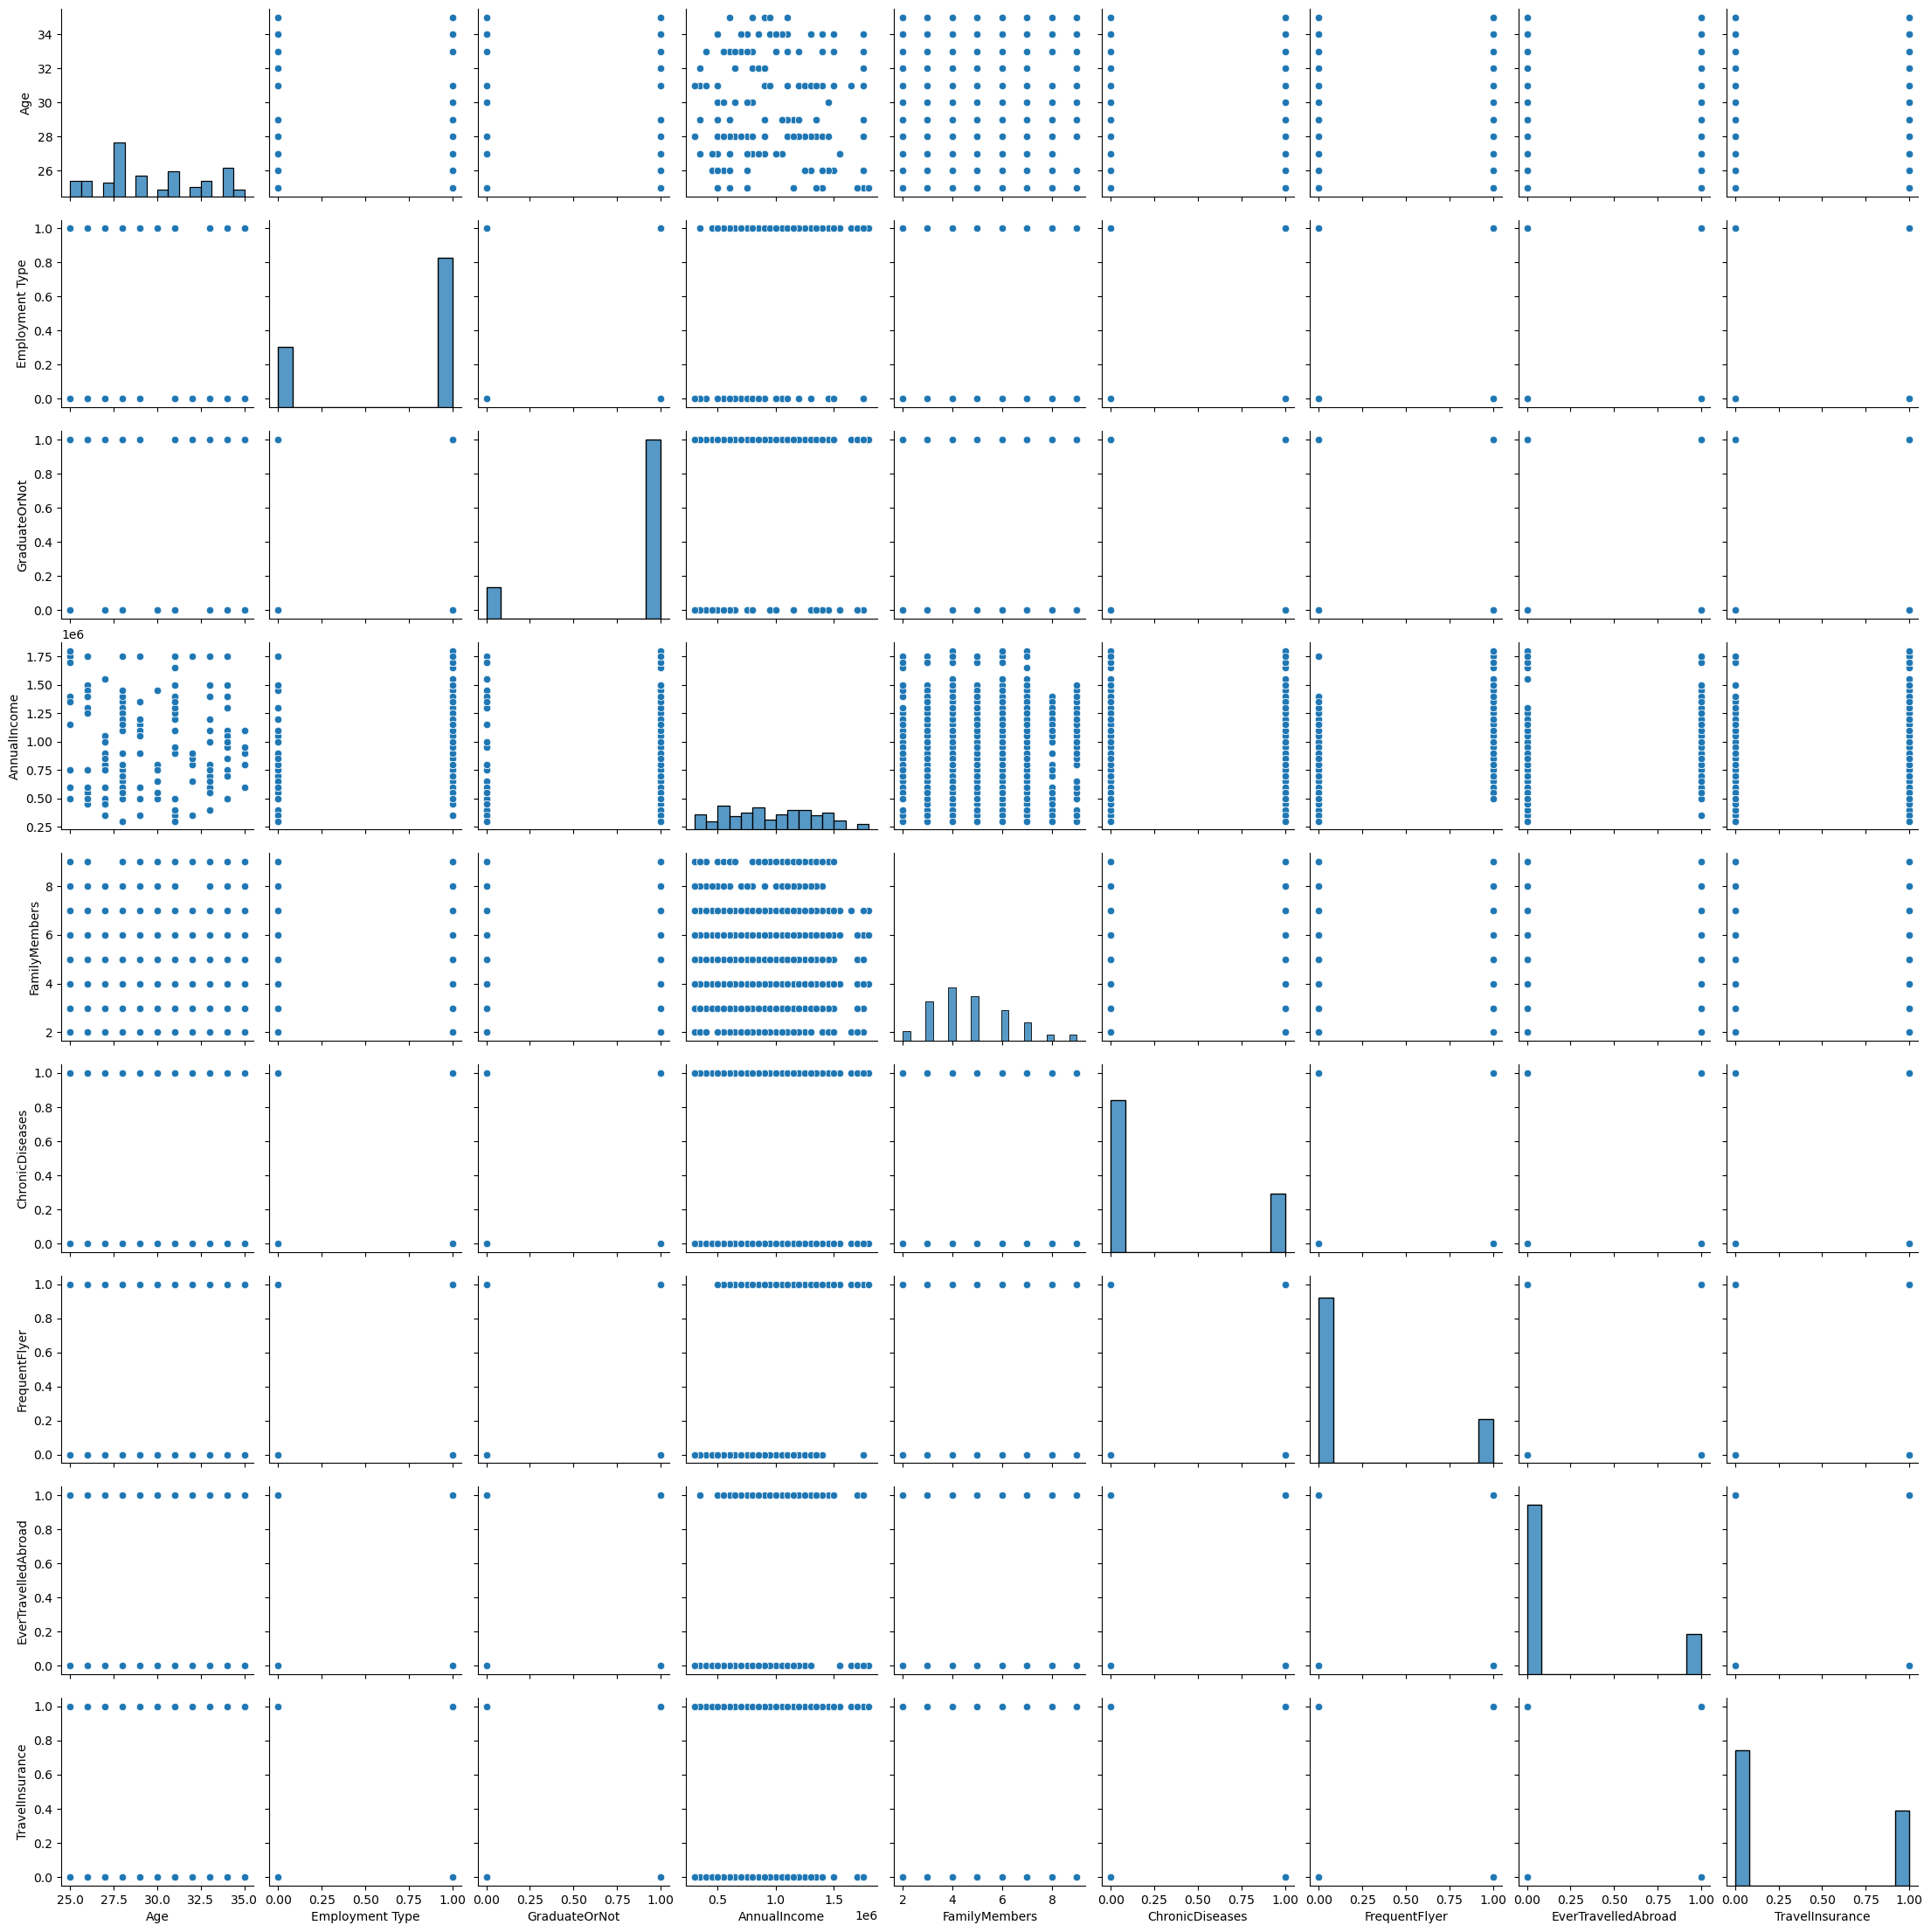

In [12]:
# Run a pairplot dropping the ID feature
sns.pairplot(data=data, vars=['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance'])
plt.show()

No outliers or highly skewed data were found in the dataset.

## Modeling: CRISP-DM Step 4

Prior to model creation we must split the data into test and train datasets.

In [13]:
# Define features and target
X = data.drop('TravelInsurance', axis=1)
y = data['TravelInsurance']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Preprocessing complete.")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Preprocessing complete.
Training set shape: (1390, 9)
Test set shape: (597, 9)


After splitting the data into test and training sets, we can begin modeling.

Model: kNN

kNN Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       384
           1       0.71      0.56      0.63       213

    accuracy                           0.76       597
   macro avg       0.75      0.72      0.73       597
weighted avg       0.76      0.76      0.75       597

kNN Accuracy: 0.7621440536013401
kNN Recall: 0.7168427230046948
kNN F1-Score: 0.7259343075132549
Time taken to run the kNN model: 0.04 seconds


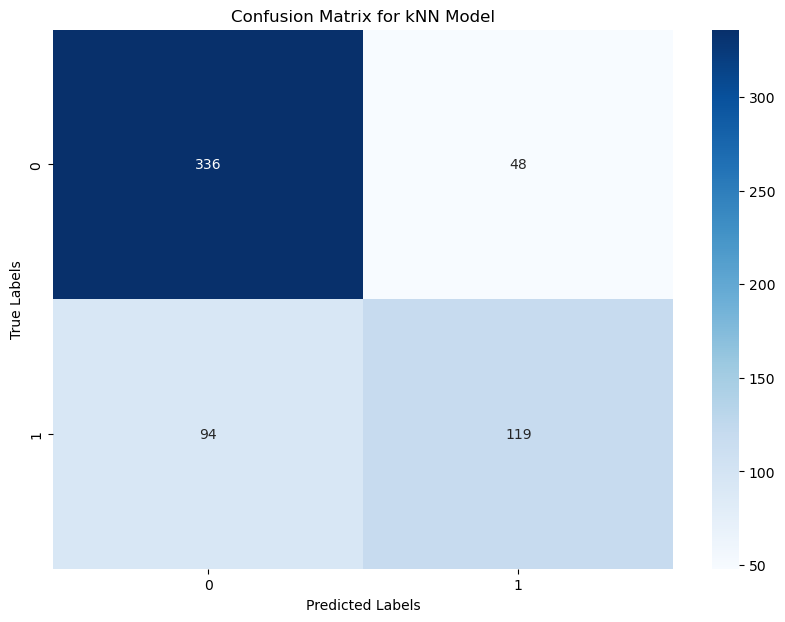

In [15]:
# Start timing
start_time = time.time()

# kNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# End timing
end_time = time.time()

# Calculate the duration
duration_knn = end_time - start_time

# Evaluation metrics for kNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

print("kNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("kNN Accuracy:", accuracy_knn)
print("kNN Recall:", recall_knn)
print("kNN F1-Score:", f1_knn)
print(f"Time taken to run the kNN model: {duration_knn:.2f} seconds")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for kNN Model')
plt.show()


The confusion matrix above correctly predicted 455 (76.2%) observations and misclassified 142 (23.8%) observations of the test dataset.

Model: Decision Tree

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       384
           1       0.66      0.65      0.65       213

    accuracy                           0.76       597
   macro avg       0.73      0.73      0.73       597
weighted avg       0.75      0.76      0.75       597

Decision Tree Accuracy: 0.7554438860971524
Decision Tree Recall: 0.7314957453051643
Decision Tree F1-Score: 0.7324546325172506
Time taken to run the Decision Tree model: 0.01 seconds


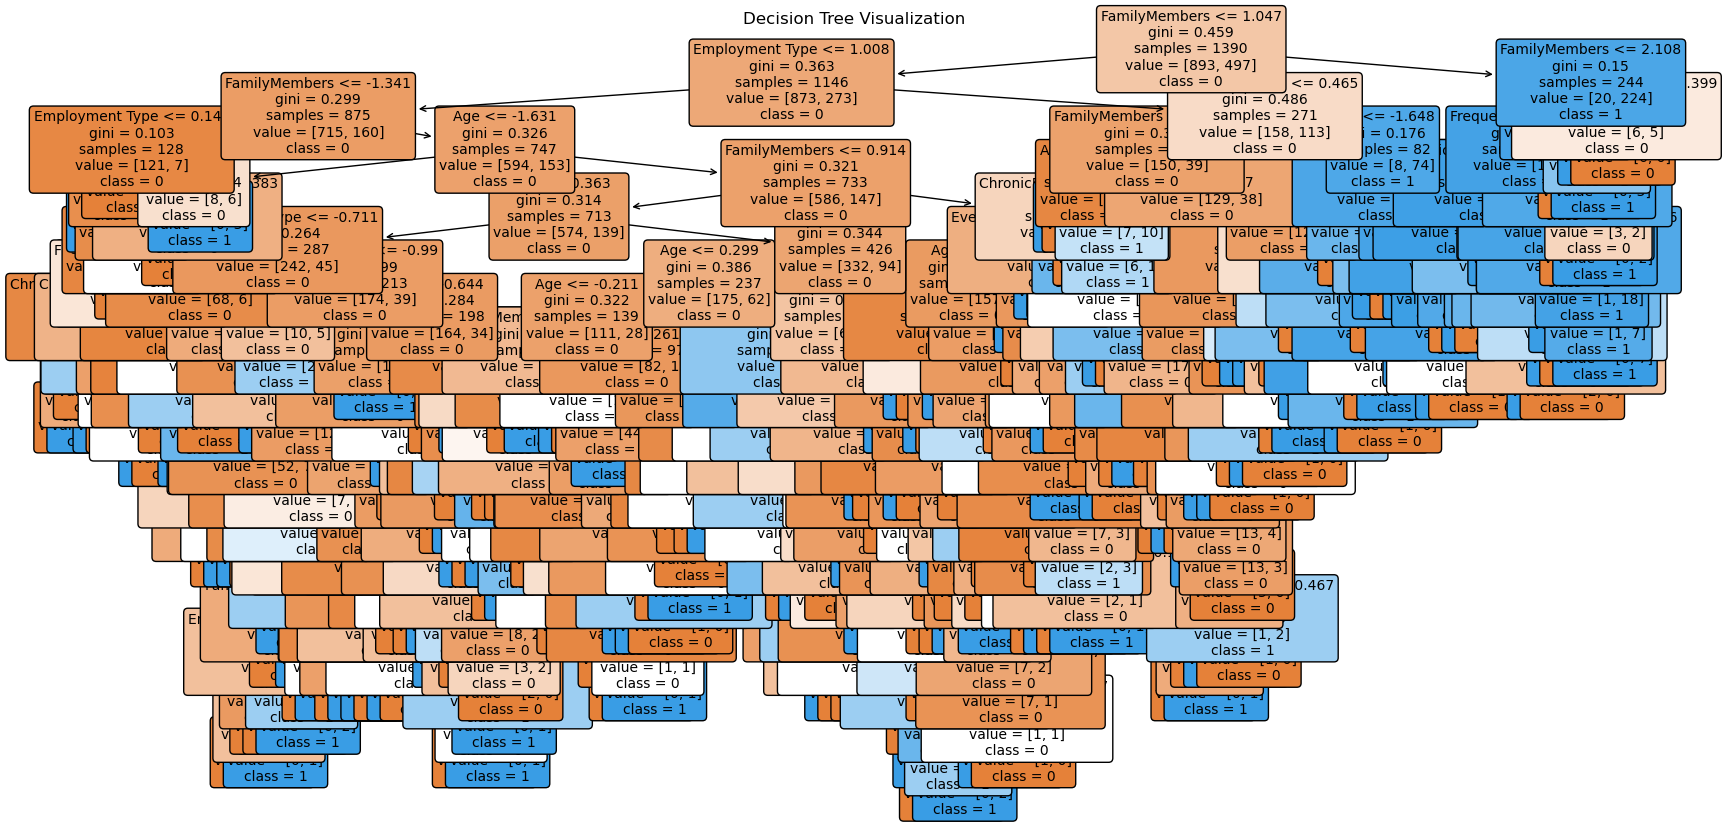

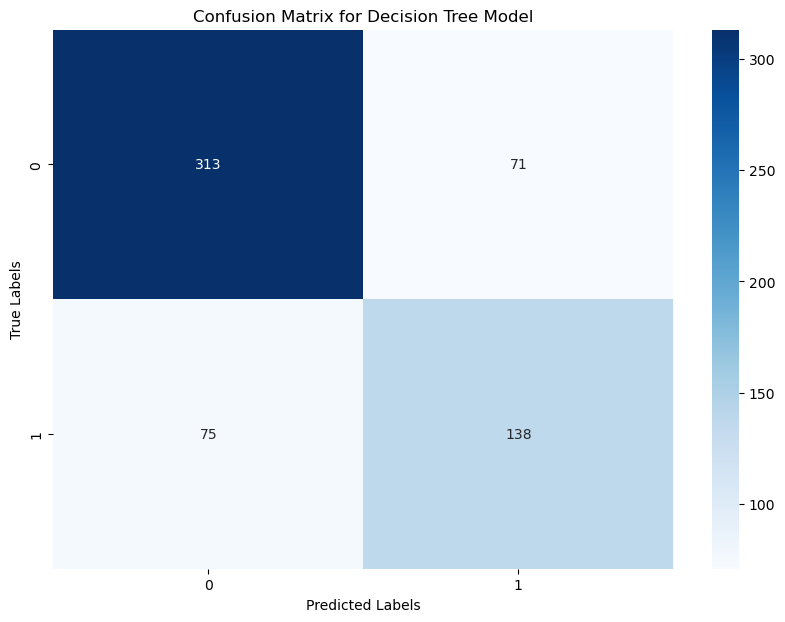

In [17]:

feature_names = ['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']


# Convert X_train and X_test to DataFrame
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Get the class names from y_train
class_names = list(map(str, set(y_train)))

# Start timing
start_time = time.time()

# Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_df, y_train)
y_pred_dt = dt.predict(X_test_df)

# End timing
end_time = time.time()
duration_dt = end_time - start_time

# Evaluation metrics for Decision Trees
accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Recall:", recall_dt)
print("Decision Tree F1-Score:", f1_dt)
print(f"Time taken to run the Decision Tree model: {duration_dt:.2f} seconds")

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()


The confusion matrix above correctly predicted 451 (75.5%) observations and misclassified 146 (24.5%) observations of the test dataset.

Model: Logistic regression

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       384
           1       0.77      0.48      0.59       213

    accuracy                           0.76       597
   macro avg       0.77      0.70      0.71       597
weighted avg       0.76      0.76      0.75       597

Logistic Regression Accuracy: 0.7638190954773869
Logistic Regression Recall: 0.7014194542253521
Logistic Regression F1-Score: 0.7135950243102457
Time taken to run the Logistic Regression model: 0.01 seconds


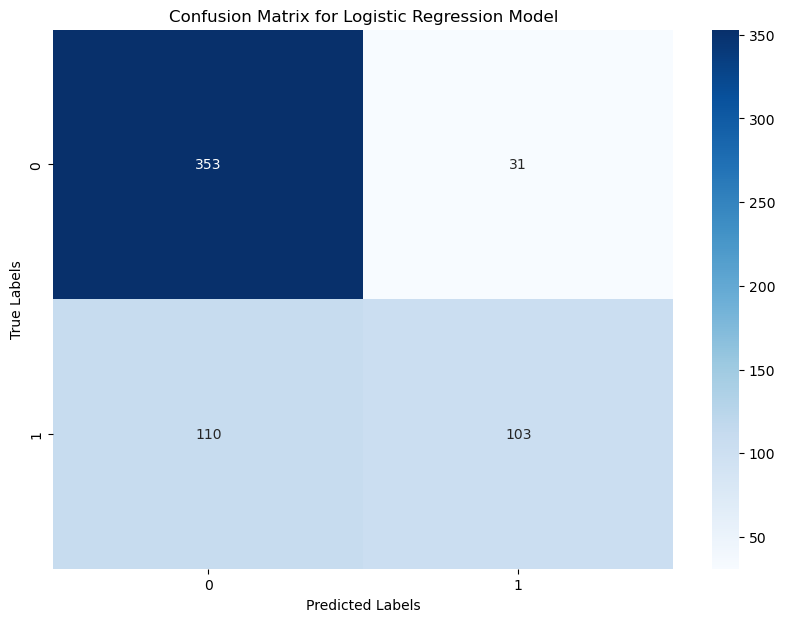

In [19]:
# Start timing
start_time = time.time()

# Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# End timing
end_time = time.time()

# Calculate the duration
duration_lr = end_time - start_time

# Evaluation metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Recall:", recall_lr)
print("Logistic Regression F1-Score:", f1_lr)
print(f"Time taken to run the Logistic Regression model: {duration_lr:.2f} seconds")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()


The confusion matrix above correctly predicted 456 (76.4%) observations and misclassified 141 (23.6%) observations of the test dataset.

Model: Support vector machine

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       384
           1       0.83      0.56      0.67       213

    accuracy                           0.80       597
   macro avg       0.81      0.75      0.76       597
weighted avg       0.81      0.80      0.79       597

SVM Accuracy: 0.8023450586264657
SVM Recall: 0.7480927230046948
SVM F1-Score: 0.7638639349977205
Time taken to run the SVM model: 0.11 seconds


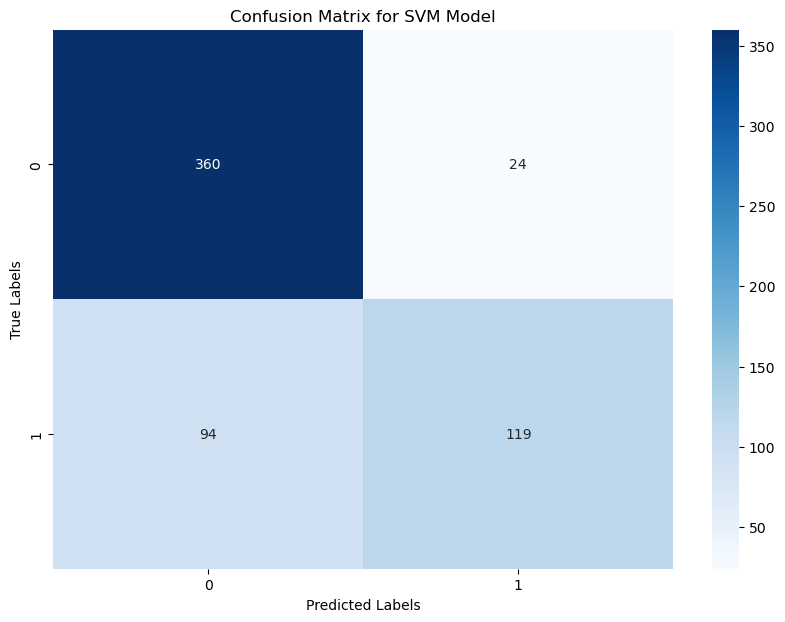

In [20]:
# Start timing
start_time_svm = time.time()

# SVM model
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# End timing
end_time_svm = time.time()
duration_svm = end_time_svm - start_time_svm

# Evaluation metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_svm)
print("SVM Recall:", recall_svm)
print("SVM F1-Score:", f1_svm)
print(f"Time taken to run the SVM model: {duration_svm:.2f} seconds")

# Confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Model')
plt.show()


The confusion matrix above correctly predicted 479 (80.2%) observations and misclassified 118 (19.8%) observations of the test dataset.

Below are revised models with hyperparameter tuning.

Tuned Logistic Regression (using GridSearchCV)

Best Parameters for Logistic Regression: {'C': 0.01, 'max_iter': 100, 'solver': 'newton-cg'}
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.83       384
           1       0.79      0.46      0.58       213

    accuracy                           0.76       597
   macro avg       0.77      0.69      0.71       597
weighted avg       0.77      0.76      0.74       597

Logistic Regression Accuracy: 0.7621440536013401
Logistic Regression Recall: 0.6938453638497653
Logistic Regression F1-Score: 0.7059398934398935
Time taken to run the Logistic Regression model: 0.79 seconds


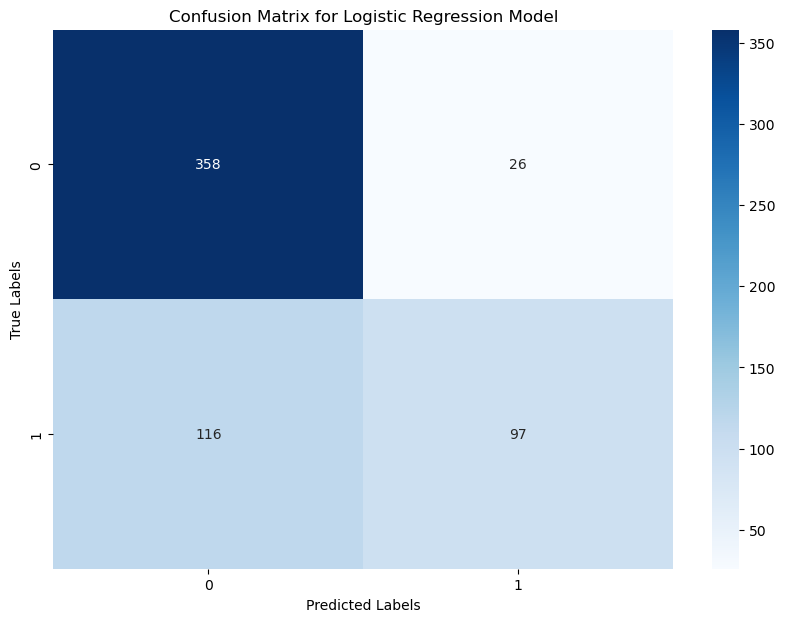

In [35]:
# Suppress warnings
warnings.filterwarnings("ignore")

feature_names = ['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']

# Convert X_train and X_test to DataFrame
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Get the class names from y_train
class_names = list(map(str, set(y_train)))

# Define the parameter grid
param_grid = {
    #'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 500]
}

# Start timing
start_time = time.time()

# Logistic Regression model with GridSearchCV
lr = LogisticRegression(random_state=42)
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_df, y_train)
best_lr = grid_search.best_estimator_
y_pred_lr = best_lr.predict(X_test_df)

# End timing
end_time = time.time()
duration_lr_gsvc = end_time - start_time

# Evaluation metrics for Logistic Regression
accuracy_lr_gsvc = accuracy_score(y_test, y_pred_lr)
recall_lr_gsvc = recall_score(y_test, y_pred_lr, average='macro')
f1_lr_gsvc = f1_score(y_test, y_pred_lr, average='macro')

print("Best Parameters for Logistic Regression:", grid_search.best_params_)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy:", accuracy_lr_gsvc)
print("Logistic Regression Recall:", recall_lr_gsvc)
print("Logistic Regression F1-Score:", f1_lr_gsvc)
print(f"Time taken to run the Logistic Regression model: {duration_lr_gsvc:.2f} seconds")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()


Tuned SVM (using GridSearchCV)

Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       384
           1       0.83      0.56      0.67       213

    accuracy                           0.80       597
   macro avg       0.81      0.75      0.76       597
weighted avg       0.81      0.80      0.79       597

SVM Accuracy: 0.8023450586264657
SVM Recall: 0.7480927230046948
SVM F1-Score: 0.7638639349977205
Time taken to run the SVM model: 30.06 seconds


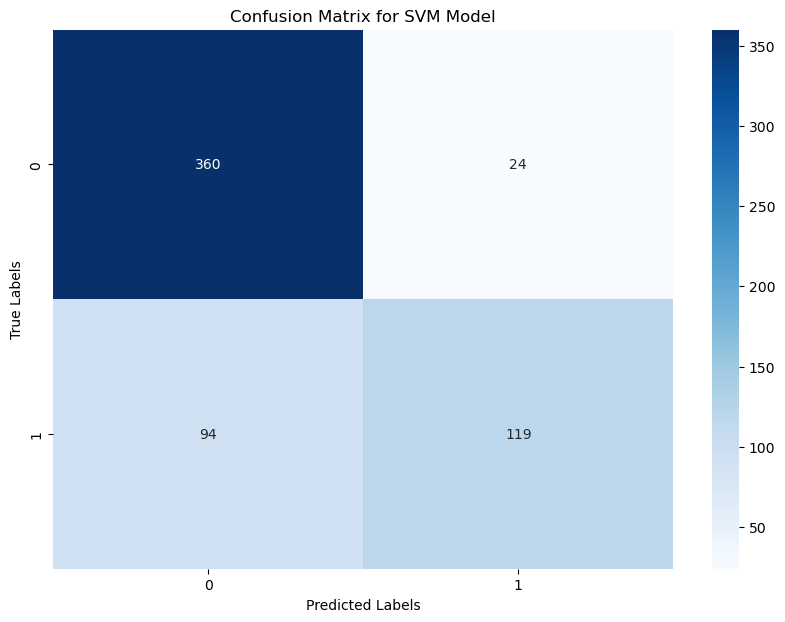

In [32]:
# Suppress warnings
warnings.filterwarnings("ignore")

feature_names = ['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']

# Convert X_train and X_test to DataFrame
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Get the class names from y_train
class_names = list(map(str, set(y_train)))

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Start timing
start_time = time.time()

# SVM model with GridSearchCV
svm = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_df, y_train)
best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test_df)

# End timing
end_time = time.time()
duration_svm_gsvc = end_time - start_time

# Evaluation metrics for SVM
accuracy_svm_gsvc = accuracy_score(y_test, y_pred_svm)
recall_svm_gsvc = recall_score(y_test, y_pred_svm, average='macro')
f1_svm_gsvc = f1_score(y_test, y_pred_svm, average='macro')

print("Best Parameters for SVM:", grid_search.best_params_)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_svm)
print("SVM Recall:", recall_svm)
print("SVM F1-Score:", f1_svm)
print(f"Time taken to run the SVM model: {duration_svm_gsvc:.2f} seconds")

# Confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Model')
plt.show()


## Evaluation: CRISP-DM Step 5

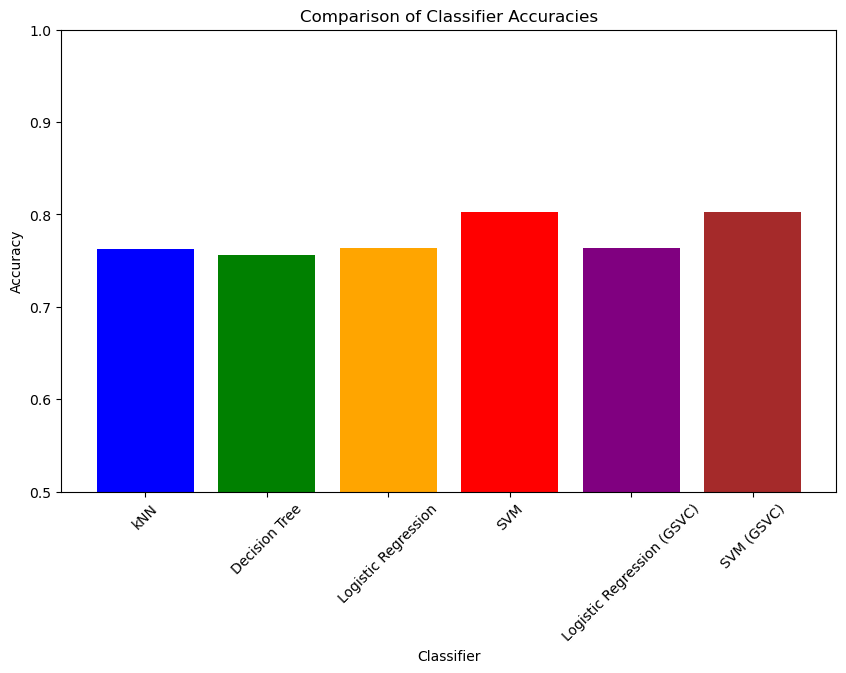

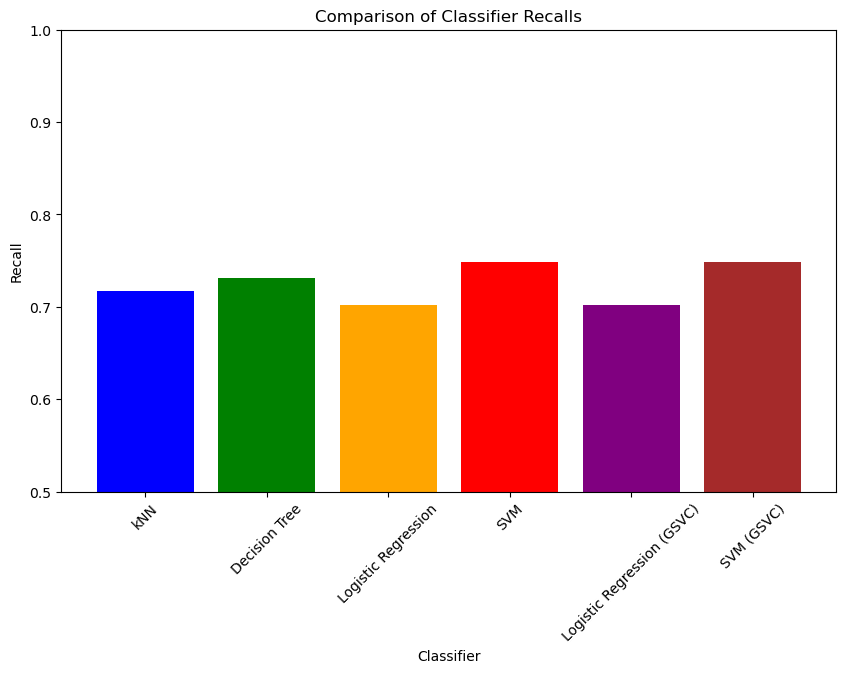

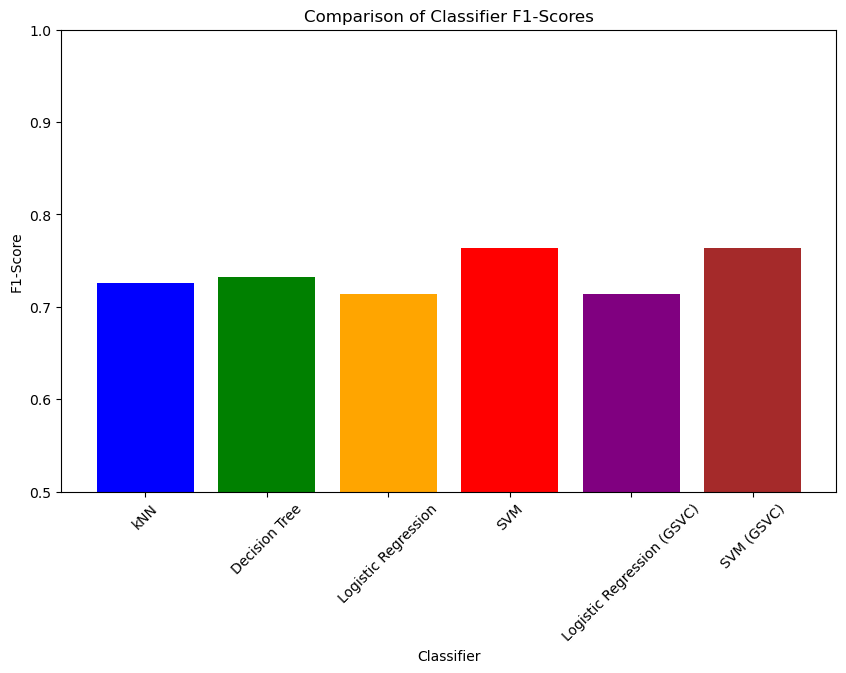

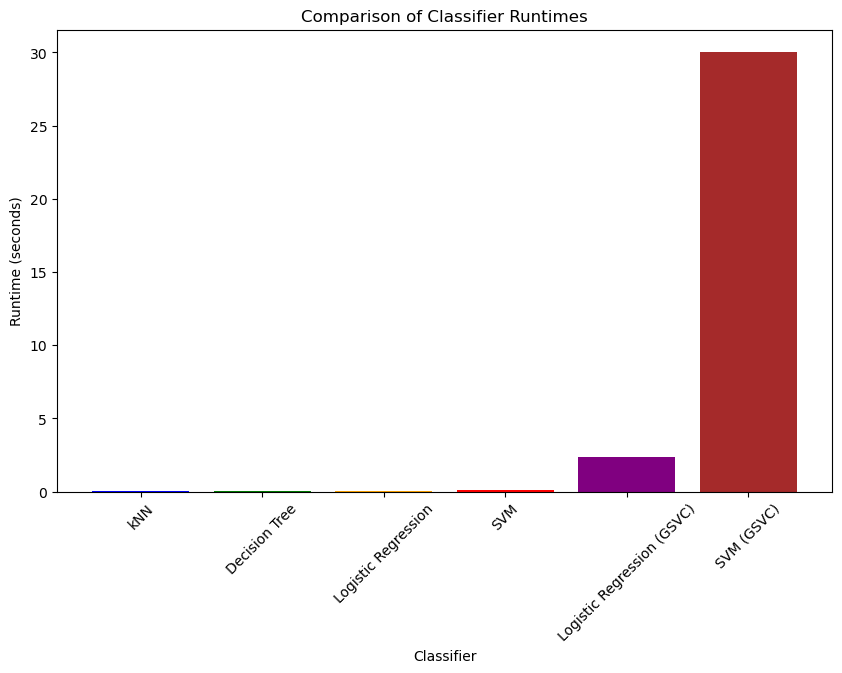

In [33]:
# Collect accuracy scores and durations
model_names = ['kNN', 'Decision Tree', 'Logistic Regression', 'SVM', 'Logistic Regression (GSVC)', 'SVM (GSVC)']
accuracies = [accuracy_knn, accuracy_dt, accuracy_lr, accuracy_svm, accuracy_lr_gsvc, accuracy_svm_gsvc]
recalls = [recall_knn, recall_dt, recall_lr, recall_svm, recall_lr_gsvc, recall_svm_gsvc]
f1_scores = [f1_knn, f1_dt, f1_lr, f1_svm, f1_lr_gsvc, f1_svm_gsvc]
durations = [duration_knn, duration_dt, duration_lr, duration_svm, duration_lr_gsvc, duration_svm_gsvc]

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'brown'])
plt.title('Comparison of Classifier Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim([0.50, 1])
plt.xticks(rotation=45)
plt.show()

# Plot recalls
plt.figure(figsize=(10, 6))
plt.bar(model_names, recalls, color=['blue', 'green', 'orange', 'red', 'purple', 'brown'])
plt.title('Comparison of Classifier Recalls')
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.ylim([0.50, 1])
plt.xticks(rotation=45)
plt.show()

# Plot F1-scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores, color=['blue', 'green', 'orange', 'red', 'purple', 'brown'])
plt.title('Comparison of Classifier F1-Scores')
plt.xlabel('Classifier')
plt.ylabel('F1-Score')
plt.ylim([0.50, 1])
plt.xticks(rotation=45)
plt.show()

# Plot durations
plt.figure(figsize=(10, 6))
plt.bar(model_names, durations, color=['blue', 'green', 'orange', 'red', 'purple', 'brown'])
plt.title('Comparison of Classifier Runtimes')
plt.xlabel('Classifier')
plt.ylabel('Runtime (seconds)')
plt.xticks(rotation=45)
plt.show()

### Findings, Recommendations and Next Steps

Findings:

kNN: 
a. Middle time taken to run: 0.10 seconds; 
b. Correct predictions: 455 (76.2%); 
c. F1-Score: 0.7168427230046948; 
d. Recall: 0.7259343075132549

Decision Tree: 
a. Quickest time to run: 0.03 seconds; 
b. Correct predictions: 451 (75.5%); 
c. F1-Score: 0.7324546325172506; 
d. Recall: 0.7314957453051643
    
Logistic Regression: 
a. Very quick time to run: 0.04 seconds; 
b. Correct predictions: 456 (76.4%); 
c. F1-Score: 0.7135950243102457; 
d. Recall: 0.7014194542253521

SVM: 
a. Slowest time to run: 0.25 seconds; 
b. Correct predictions: 479 (80.2%); 
c. F1-Score: 0.7638639349977205; 
d. Recall: 0.7480927230046948

Tuned Models:

Logistic Regression using GridSearchCV: 
a. Very quick time to run: 60.85 seconds; 
b. Correct predictions: 455 (76.2%); 
c. F1-Score: 0.7059398934398935; 
d. Recall: 0.6938453638497653

SVM using GridSearchCV: 
a. Very quick time to run: 50.09 seconds; 
b. Correct predictions: 479 (80.2%); 
c. F1-Score: 0.7638639349977205; 
d. Recall: 0.7480927230046948


Recommendations:
    
1. Consider using SVM for future modeling due to its high accuacy at the cost of model speed
2. Further tune hyperpatameters for potentially better performance
3. Integrate feature engineering to enhance model accuracy

Next Steps:
    
1. Perform cross-validation to ensure model stability

### Conclusion

The analysis shows that SVM classifier provide the best performance for predicting conversion. With proper tuning and potential feature engineering, this models can be further improved to achieve better predictive accuracy. The output metrics provided clear insights making offers of travel insurance more efficient and actionable for the business.